<a href="https://colab.research.google.com/github/Jubi-Wismi/hands-on-sql-3086685/blob/main/ResNet50_animal_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix

In [3]:
import os
import pandas as pd

path = "/content/drive/MyDrive/animals/"

data = {"imgpath": [], "labels": []}

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path, folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)

df = pd.DataFrame(data)

#Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

In [5]:

import pandas as pd


class_counts = df['labels'].value_counts().to_dict()
print(class_counts)

{'whale': 60, 'goat': 60, 'duck': 60, 'fox': 60, 'elephant': 60, 'eagle': 60, 'donkey': 60, 'flamingo': 60, 'hornbill': 60, 'hamster': 60, 'gorilla': 60, 'hedgehog': 60, 'grasshopper': 60, 'horse': 60, 'hippopotamus': 60, 'hummingbird': 60, 'hare': 60, 'goose': 60, 'kangaroo': 60, 'hyena': 60, 'mosquito': 60, 'goldfish': 60, 'dragonfly': 60, 'wombat': 60, 'fly': 60, 'bison': 60, 'antelope': 60, 'bear': 60, 'badger': 60, 'beetle': 60, 'boar': 60, 'bee': 60, 'butterfly': 60, 'cat': 60, 'dog': 60, 'crow': 60, 'cow': 60, 'dolphin': 60, 'caterpillar': 60, 'cockroach': 60, 'deer': 60, 'crab': 60, 'chimpanzee': 60, 'coyote': 60, 'lion': 60, 'lizard': 60, 'ladybugs': 60, 'lobster': 60, 'raccoon': 60, 'shark': 60, 'seal': 60, 'sheep': 60, 'snake': 60, 'rhinoceros': 60, 'seahorse': 60, 'squirrel': 60, 'sparrow': 60, 'sandpiper': 60, 'squid': 60, 'swan': 60, 'wolf': 60, 'turtle': 60, 'zebra': 60, 'woodpecker': 60, 'tiger': 60, 'starfish': 60, 'turkey': 60, 'pigeon': 60, 'possum': 60, 'pig': 60, '

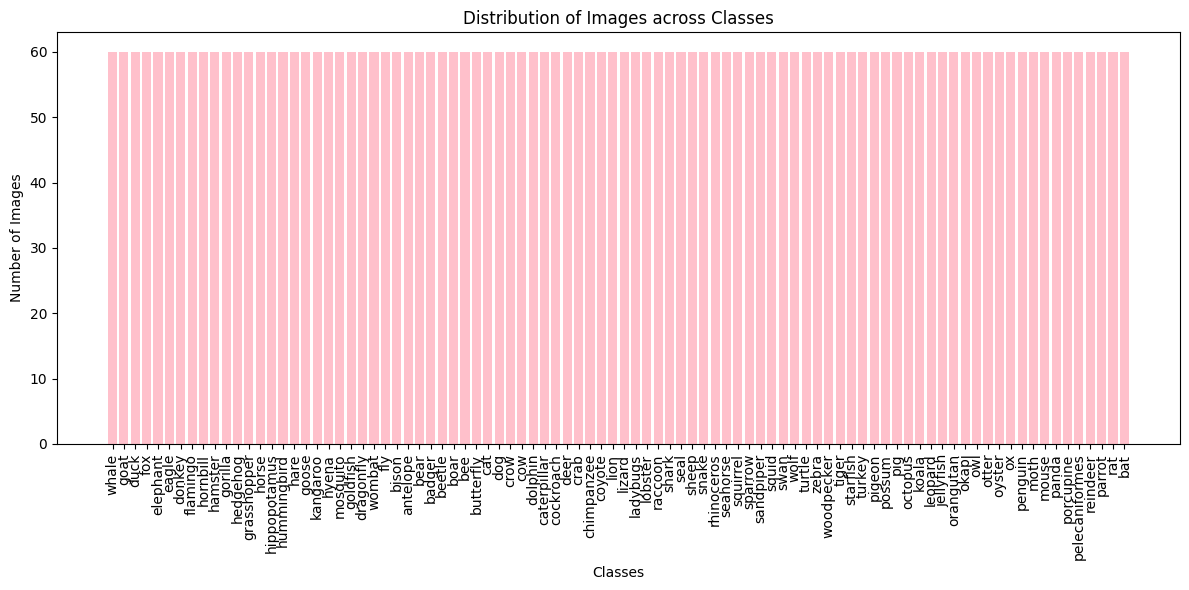

In [7]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
class_counts = {'whale': 60, 'goat': 60, 'duck': 60, 'fox': 60, 'elephant': 60, 'eagle': 60, 'donkey': 60, 'flamingo': 60, 'hornbill': 60, 'hamster': 60, 'gorilla': 60, 'hedgehog': 60, 'grasshopper': 60, 'horse': 60, 'hippopotamus': 60, 'hummingbird': 60, 'hare': 60, 'goose': 60, 'kangaroo': 60, 'hyena': 60, 'mosquito': 60, 'goldfish': 60, 'dragonfly': 60, 'wombat': 60, 'fly': 60, 'bison': 60, 'antelope': 60, 'bear': 60, 'badger': 60, 'beetle': 60, 'boar': 60, 'bee': 60, 'butterfly': 60, 'cat': 60, 'dog': 60, 'crow': 60, 'cow': 60, 'dolphin': 60, 'caterpillar': 60, 'cockroach': 60, 'deer': 60, 'crab': 60, 'chimpanzee': 60, 'coyote': 60, 'lion': 60, 'lizard': 60, 'ladybugs': 60, 'lobster': 60, 'raccoon': 60, 'shark': 60, 'seal': 60, 'sheep': 60, 'snake': 60, 'rhinoceros': 60, 'seahorse': 60, 'squirrel': 60, 'sparrow': 60, 'sandpiper': 60, 'squid': 60, 'swan': 60, 'wolf': 60, 'turtle': 60, 'zebra': 60, 'woodpecker': 60, 'tiger': 60, 'starfish': 60, 'turkey': 60, 'pigeon': 60, 'possum': 60, 'pig': 60, 'octopus': 60, 'koala': 60, 'leopard': 60, 'jellyfish': 60, 'orangutan': 60, 'okapi': 60, 'owl': 60, 'otter': 60, 'oyster': 60, 'ox': 60, 'penguin': 60, 'moth': 60, 'mouse': 60, 'panda': 60, 'porcupine': 60, 'pelecaniformes': 60, 'reindeer': 60, 'parrot': 60, 'rat': 60, 'bat': 60}

# Extract class names and corresponding image counts
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(class_names, image_counts, color='pink')
plt.xticks(rotation=90)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Classes')
plt.tight_layout()
plt.show()


In [ ]:
unique_labels = df['labels'].unique()

# Sort the unique labels alphabetically or in any desired order
unique_labels = sorted(unique_labels)

# Use the sorted unique_labels list as your labels
labels = unique_labels


In [ ]:
print(labels)

['whale', 'wombat', 'turkey', 'starfish', 'tiger', 'woodpecker', 'zebra', 'turtle', 'wolf', 'swan', 'squid', 'sandpiper', 'sparrow', 'squirrel', 'seahorse', 'rhinoceros', 'snake', 'sheep', 'seal', 'shark', 'raccoon', 'pigeon', 'possum', 'pig', 'penguin', 'rat', 'parrot', 'reindeer', 'pelecaniformes', 'porcupine', 'panda', 'mouse', 'moth', 'ox', 'octopus', 'oyster', 'otter', 'owl', 'okapi', 'orangutan', 'jellyfish', 'leopard', 'koala', 'lobster', 'ladybugs', 'lizard', 'lion', 'mosquito', 'hyena', 'kangaroo', 'goose', 'hare', 'hummingbird', 'hippopotamus', 'horse', 'grasshopper', 'hedgehog', 'gorilla', 'hamster', 'hornbill', 'flamingo', 'donkey', 'eagle', 'elephant', 'fox', 'duck', 'goldfish', 'goat', 'dragonfly', 'fly', 'coyote', 'chimpanzee', 'crab', 'deer', 'cockroach', 'caterpillar', 'dolphin', 'cow', 'crow', 'dog', 'cat', 'butterfly', 'bee', 'boar', 'beetle', 'badger', 'bear', 'antelope', 'bison', 'bat']


In [ ]:
train_df, Temp_df = train_test_split(df,  train_size= 0.70 , shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df ,  train_size= 0.70 , shuffle=True, random_state=124)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# print(train_df.shape)
# print(valid_df.shape)
# print(test_df.shape)

print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath    labels
0  /content/drive/MyDrive/animals/hedgehog/4c9687...  hedgehog
1  /content/drive/MyDrive/animals/squid/8bd8c271a...     squid
2  /content/drive/MyDrive/animals/otter/5d2506616...     otter
3  /content/drive/MyDrive/animals/tiger/15b4abdb6...     tiger
4  /content/drive/MyDrive/animals/octopus/7d0a974...   octopus
(3779, 3)
--------Validation----------
                                             imgpath       labels
0  /content/drive/MyDrive/animals/parrot/46de4406...       parrot
1  /content/drive/MyDrive/animals/hedgehog/1fdc0e...     hedgehog
2  /content/drive/MyDrive/animals/caterpillar/061...  caterpillar
3  /content/drive/MyDrive/animals/elephant/70c11a...     elephant
4  /content/drive/MyDrive/animals/pig/6f2e4c525a.jpg          pig
(1134, 3)
----------Test--------------
                                             imgpath    labels
0  /content/drive/MyDrive/animals/dolphin/4a8c89c...   d

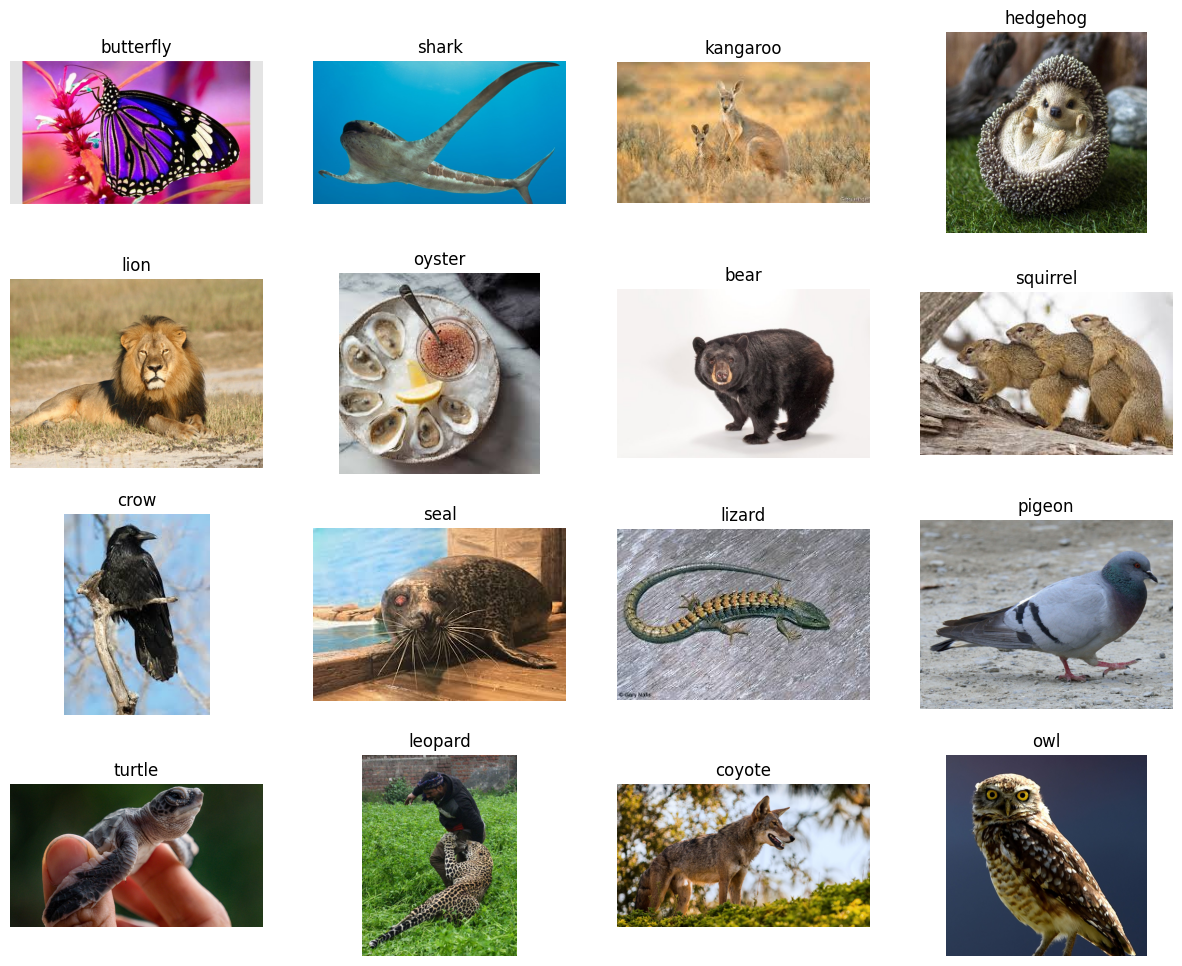

In [ ]:

plt.figure(figsize=(15,12))
for i, row in test_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [4]:
# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
from tensorflow.keras.applications.resnet import preprocess_input
mixed_precision.set_global_policy('mixed_float16')

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
%%time
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
BATCH_SIZE = 36
IMAGE_SIZE = (224, 224)



generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,

)



# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 3779 validated image filenames belonging to 90 classes.
Found 1134 validated image filenames belonging to 90 classes.
Found 487 validated image filenames belonging to 90 classes.
CPU times: user 160 ms, sys: 128 ms, total: 288 ms
Wall time: 1.11 s


In [ ]:
# Load a different pretrained model, for example, ResNet50
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

# Freeze the layers of the pretrained model
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.15),
  layers.experimental.preprocessing.RandomZoom(0.15),
  # layers.experimental.preprocessing.RandomContrast(0.15),
], name='AugmentationLayer')



inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(256)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(num_classes)(x)



outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x)
 # mixed_precision need separated Dense and Activation layers
model = Model(inputs=inputs, outputs=outputs)



model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.load_weights('./checkpoints/my_checkpoint01')
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                               

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=15,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint2final')
model.save("model3.h5")
model.save("model4.h5")

Epoch 1/15
105/105 [==============================] - 2058s 20s/step - loss: 3.5506 - accuracy: 0.2231 - val_loss: 1.9801 - val_accuracy: 0.5062 - lr: 5.0000e-04
Epoch 2/15
105/105 [==============================] - 42s 398ms/step - loss: 1.7218 - accuracy: 0.5994 - val_loss: 1.0949 - val_accuracy: 0.7399 - lr: 5.0000e-04
Epoch 3/15
105/105 [==============================] - 41s 387ms/step - loss: 1.1848 - accuracy: 0.7290 - val_loss: 0.8382 - val_accuracy: 0.8034 - lr: 5.0000e-04
Epoch 4/15
105/105 [==============================] - 41s 392ms/step - loss: 0.9143 - accuracy: 0.7917 - val_loss: 0.7487 - val_accuracy: 0.8175 - lr: 5.0000e-04
Epoch 5/15
105/105 [==============================] - 43s 412ms/step - loss: 0.7546 - accuracy: 0.8280 - val_loss: 0.6937 - val_accuracy: 0.8183 - lr: 5.0000e-04
Epoch 6/15
105/105 [==============================] - 41s 391ms/step - loss: 0.6116 - accuracy: 0.8531 - val_loss: 0.6458 - val_accuracy: 0.8289 - lr: 5.0000e-04
Epoch 7/15
105/105 [========

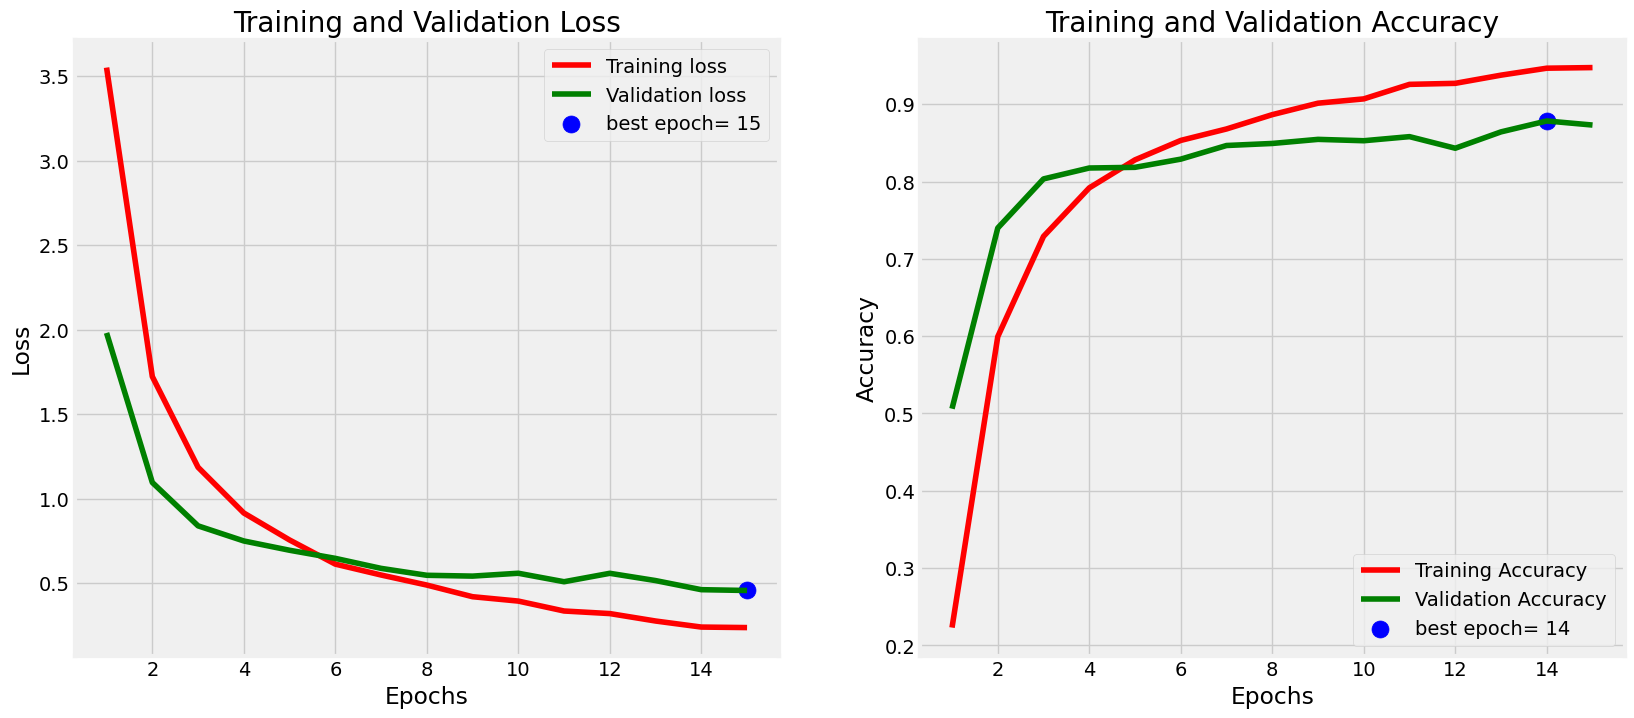

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:

results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.47095
Test Accuracy: 87.06%


In [ ]:
y_true = test_images.classes
y_pred = np.argmax(model.predict(test_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))


14/14 [==============================] - 6s 287ms/step
F1 Score: 0.856749243857087
                precision    recall  f1-score   support

      antelope       0.75      0.86      0.80         7
        badger       1.00      1.00      1.00         2
           bat       0.75      1.00      0.86         3
          bear       1.00      1.00      1.00         8
           bee       0.50      0.67      0.57         3
        beetle       1.00      0.86      0.92         7
         bison       1.00      1.00      1.00         5
          boar       1.00      1.00      1.00         4
     butterfly       1.00      0.83      0.91         6
           cat       1.00      0.71      0.83         7
   caterpillar       1.00      0.33      0.50         3
    chimpanzee       1.00      0.50      0.67         6
     cockroach       0.80      1.00      0.89         4
           cow       0.80      1.00      0.89         4
        coyote       0.70      1.00      0.82         7
          crab      

In [ ]:

classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))),
                            "Test Labels" : test_images.labels,
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                           })
Predictions.head(8)

14/14 [==============================] - 4s 305ms/step


Image Index  Test Labels Test Classes  Prediction Labels  \
0            0           19      dolphin                 19   
1            1            6        bison                  6   
2            2           84       turtle                 84   
3            3            7         boar                  7   
4            4           24     elephant                 24   
5            5           29     goldfish                 29   
6            6           52      octopus                 52   
7            7           23        eagle                 23   

  Prediction Classes                                               Path  \
0            dolphin  /content/drive/MyDrive/animals/dolphin/4a8c89c...   
1              bison  /content/drive/MyDrive/animals/bison/60d925696...   
2             turtle  /content/drive/MyDrive/animals/turtle/0a47b7d0...   
3               boar  /content/drive/MyDrive/animals/boar/549c6255cb...   
4           elephant  /content/drive/MyDrive/animals/elephant/18d284...   
5           goldfish  /content/drive/MyDrive/animals/goldfish/05f378...   
6            octopus  /content/drive/MyDrive/animals/octopus/72a7d3f...   
7              eagle  /content/drive/MyDrive/animals/eagle/5c75295ae...   

   Prediction Probability  
0                0.676525  
1                0.999552  
2                0.996216  
3                0.992721  
4                0.959493  
5                0.985230  
6                0.602446  
7                0.933496

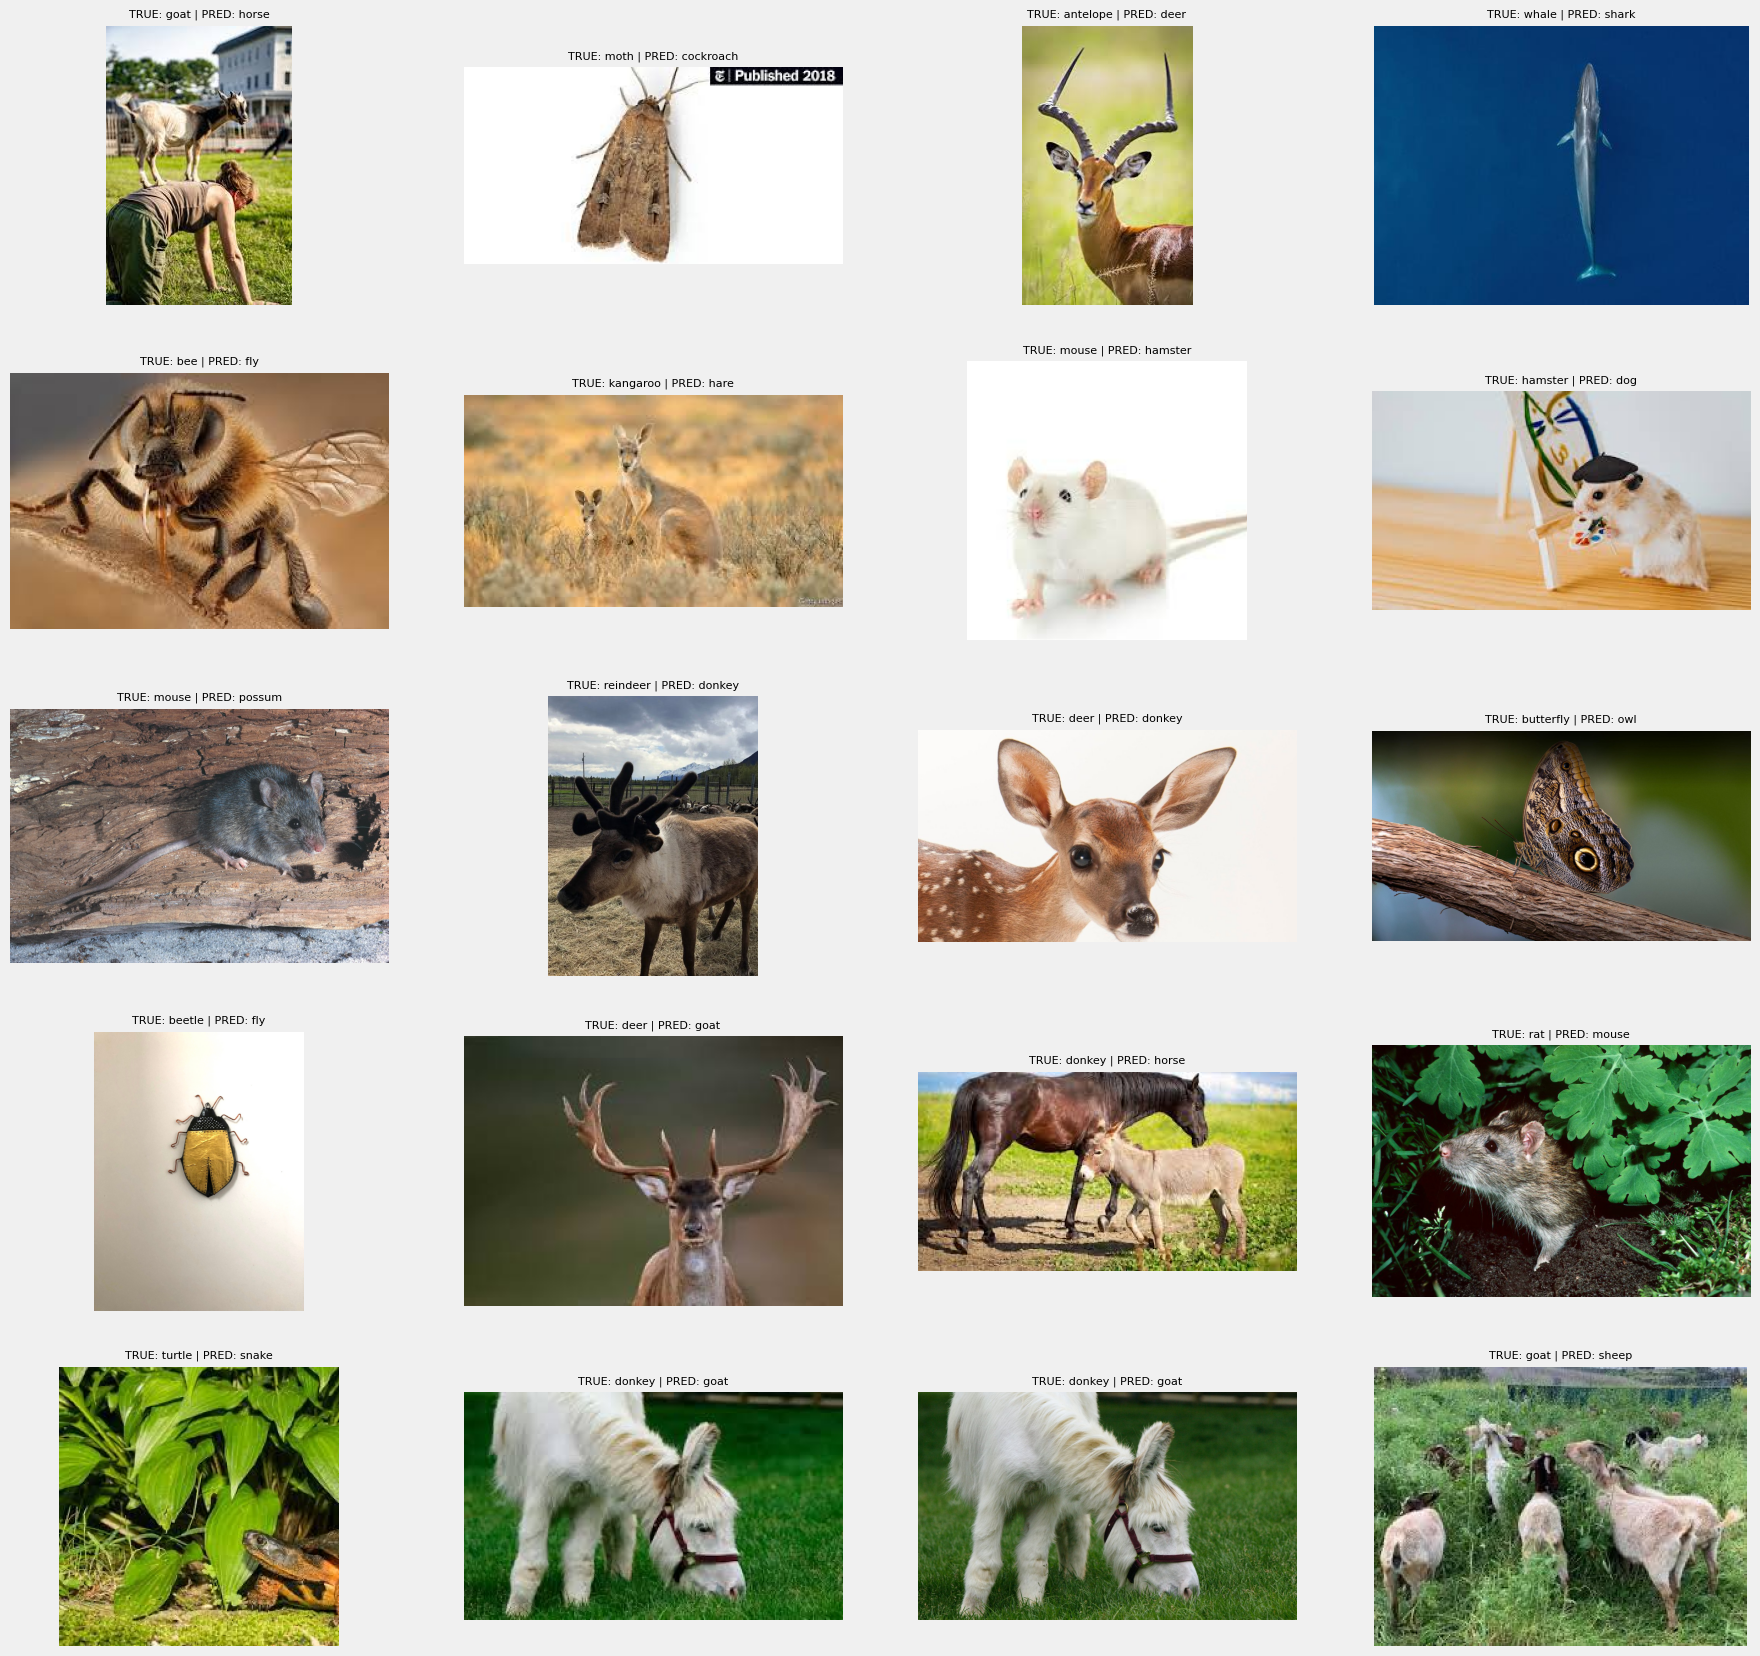

In [ ]:
plt.figure(figsize=(20,20))
for i, row in Predictions[Predictions["Test Labels"] != Predictions["Prediction Labels"]].sort_values("Prediction Probability").tail(20).reset_index().iterrows():
    plt.subplot(5,4,i+1)
    image_path = row['Path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'TRUE: {row["Test Classes"]} | PRED: {row["Prediction Classes"]}', fontsize=8)
    plt.axis('off')

plt.show()

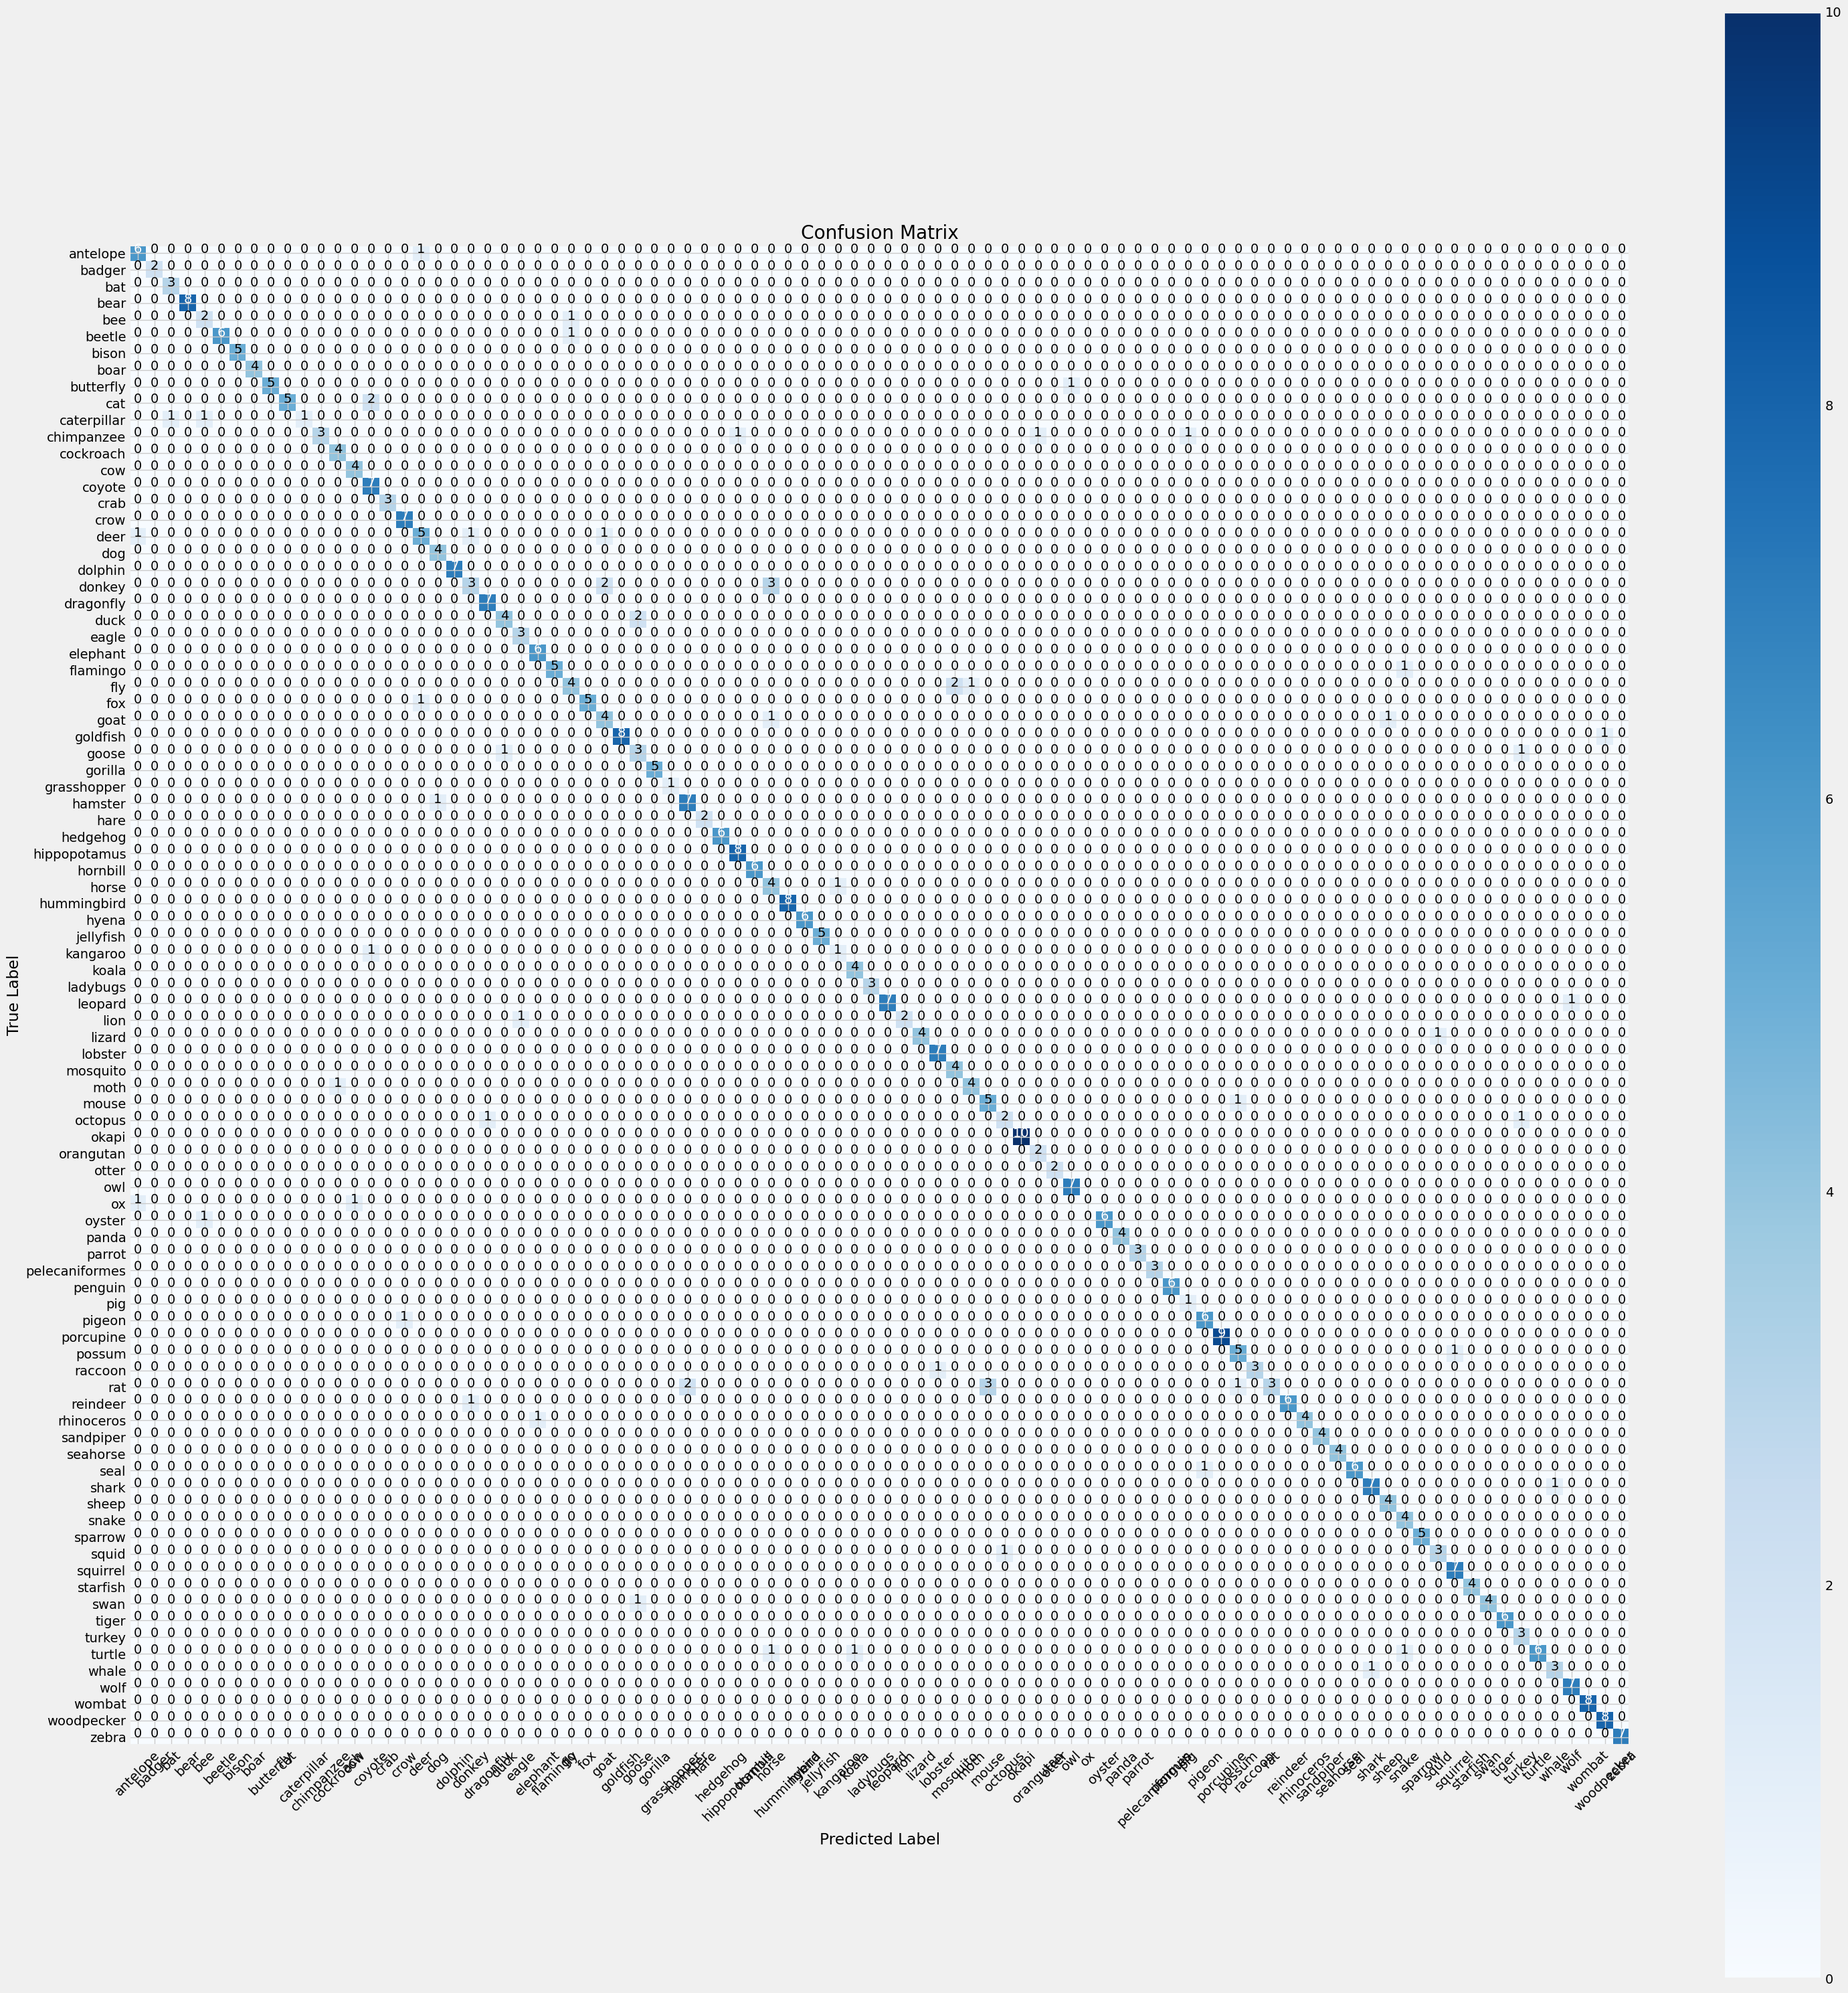

In [ ]:

preds = model.predict_generator(test_images)
y_pred = np.argmax(preds, axis=1)
g_dict = test_images.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_images.classes, y_pred)

plt.figure(figsize= (30, 30))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import itertools

# Load your model
model = load_model("/content/drive/MyDrive/Colab Notebooks/model3.h5")  # Load your trained model

# Load and preprocess the single image you want to predict
image_path = "path_to_single_image.jpg"
img = load_and_preprocess_image(image_path)  # Define a function to load and preprocess the image

# Predict the single image
preds = model.predict(np.expand_dims(img, axis=0))  # Predict the single image

# Assuming you have a list of class labels
classes = ['class1', 'class2', 'class3', ...]  # Replace with your actual class labels

# Get the predicted class label
predicted_class = np.argmax(preds)

# Create a confusion matrix for the single image
true_class = 0  # Replace with the true class index of the single image
confusion_matrix_single = confusion_matrix([true_class], [predicted_class])

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix_single, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Single Image')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = confusion_matrix_single.max() / 2.
for i, j in itertools.product(range(confusion_matrix_single.shape[0]), range(confusion_matrix_single.shape[1])):
    plt.text(j, i, confusion_matrix_single[i, j], horizontalalignment='center', color='white' if confusion_matrix_single[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


OSError: ignored

In [ ]:
# main.py


# from flask import Flask, request, jsonify, render_template
# from tensorflow.keras.models import load_model
# from PIL import Image
# import numpy as np

# app = Flask(__name__)

# # Load your trained model
# model = load_model("model3.h5")

# # Define your class labels
# labels = [
#     'whale', 'wombat', 'turkey', 'starfish', 'tiger', 'woodpecker', 'zebra', 'turtle', 'wolf', 'swan',
#     'squid', 'sandpiper', 'sparrow', 'squirrel', 'seahorse', 'rhinoceros', 'snake', 'sheep', 'seal', 'shark',
#     'raccoon', 'pigeon', 'possum', 'pig', 'penguin', 'rat', 'parrot', 'reindeer', 'pelecaniformes', 'porcupine',
#     'panda', 'mouse', 'moth', 'ox', 'octopus', 'oyster', 'otter', 'owl', 'okapi', 'orangutan', 'jellyfish',
#     'leopard', 'koala', 'lobster', 'ladybugs', 'lizard', 'lion', 'mosquito', 'hyena', 'kangaroo', 'goose',
#     'hare', 'hummingbird', 'hippopotamus', 'horse', 'grasshopper', 'hedgehog', 'gorilla', 'hamster', 'hornbill',
#     'flamingo', 'donkey', 'eagle', 'elephant', 'fox', 'duck', 'goldfish', 'goat', 'dragonfly', 'fly', 'coyote',
#     'chimpanzee', 'crab', 'deer', 'cockroach', 'caterpillar', 'dolphin', 'cow', 'crow', 'dog', 'cat', 'butterfly',
#     'bee', 'boar', 'beetle', 'badger', 'bear', 'antelope', 'bison', 'bat'
# ]

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     try:
#         # Get the uploaded image from the request
#         file = request.files['image']
#         image = Image.open(file)
#         image = image.resize((224, 224))  # Resize to match model input size
#         image = np.array(image) / 255.0  # Normalize the image data

#         # Make a prediction
#         prediction = model.predict(np.expand_dims(image, axis=0))

#         # Get the top N predicted classes and their probabilities
#         predicted_label = labels[np.argmax(prediction)]

#         return jsonify({'prediction': predicted_label})

#     except Exception as e:
#         return jsonify({'error': str(e)})
# if __name__ == '__main__':
#     app.run(debug=True)








# index.html


# <!DOCTYPE HTML>

# <html>

# 	<head>
# 		<title> </title>
# 		<meta http-equiv="content-type" content="text/html; charset=utf-8" />
# 		<meta name="description" content="" />
# 		<meta name="keywords" content="" />
# 		<!--[if lte IE 8]><script src="css/ie/html5shiv.js"></script><![endif]-->
# 		<script src="js/jquery.min.js"></script>
# 		<script src="js/jquery.dropotron.min.js"></script>
# 		<script src="js/jquery.scrollgress.min.js"></script>
# 		<script src="js/jquery.scrolly.min.js"></script>
# 		<script src="js/jquery.slidertron.min.js"></script>
# 		<script src="js/skel.min.js"></script>
# 		<script src="js/skel-layers.min.js"></script>
# 		<script src="js/init.js"></script>
# 		<noscript>
# 			<link rel="stylesheet" href="css/skel.css" />
# 			<link rel="stylesheet" href="css/style.css" />
# 			<link rel="stylesheet" href="css/style-xlarge.css" />
# 		</noscript>
# 		<!--[if lte IE 9]><link rel="stylesheet" href="css/ie/v9.css" /><![endif]-->
# 		<!--[if lte IE 8]><link rel="stylesheet" href="css/ie/v8.css" /><![endif]-->
# 	</head>
# 	<body class="landing">

# 		<!-- Header -->
# 			<header id="header" class="alt skel-layers-fixed">
# 				<h1><a href="index.html">Animal Species Predictor <span></span></a></h1>

# 			</header>

# 		<!-- Banner -->
# 			<section id="banner">
# 				<div class="inner">
# 					<h2>Animal Species Predictor</h2>
# 					<p></p>

# 					<h1>Upload an Image of an Animal</h1>
#     <form action="/predict" method="POST" enctype="multipart/form-data" id="upload-form">
#         <input type="file" name="image">
#         <input type="submit" value="Upload and Predict">
#     </form>
#     <p id="prediction"></p>



#      <script>

# 		  document.getElementById('upload-form').addEventListener('submit', function(e) {
#             e.preventDefault();
#             var formData = new FormData(this);
#             fetch('/predict', {
#                 method: 'POST',
#                 body: formData
#             })
#             .then(response => response.json())
#             .then(data => {

#                 document.getElementById('prediction').innerText = 'Prediction: ' + data.prediction;
#             })
#             .catch(error => {
#                 console.error('Error:', error);
#             });
#         });



#     </script>








# 		<!-- Footer -->
# 			<footer id="footer">

# 				<span class="copyright">
# 					&copy; Copyright. All rights reserved. Design by Jubi Wismi</a>
# 				</span>
# 			</footer>

# 	</body>

# </html>



# # index1.html

# # <!DOCTYPE html>
# # <html>
# # <head>
# #     <title>Image Classification</title>
# # </head>
# # <body>
# #     <h1>Image Classification</h1>
# #     <form action="/predict" method="POST" enctype="multipart/form-data" id="upload-form">
# #         <input type="file" name="image">
# #         <input type="submit" value="Upload and Predict">
# #     </form>
# #     <p id="prediction"></p>
# #     <script>
# #         document.getElementById('upload-form').addEventListener('submit', function(e) {
# #             e.preventDefault();
# #             var formData = new FormData(this);
# #             fetch('/predict', {
# #                 method: 'POST',
# #                 body: formData
# #             })
# #             .then(response => response.json())
# #             .then(data => {
# #                 document.getElementById('prediction').innerText = 'Prediction: ' + data.prediction;
# #             })
# #             .catch(error => {
# #                 console.error('Error:', error);
# #             });
# #         });
# #     </script>
# # </body>
# # </html>
